<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/05_tranfer_learning_in_tensorflow_part_2_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py



--2024-04-29 10:15:09--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.4’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-04-29 10:15:09 (77.2 MB/s) - ‘helper_functions.py.4’ saved [10246/10246]



In [15]:
from  helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

#mmm

In [16]:
!wget !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2024-04-29 10:20:30--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2024-04-29 10:20:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  22.3MB/s    in 8.2s    

2024-04-29 10:20:39 (19.7 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]

FINISHED --2024-04-29 10:20:39--
Total wall clock time: 8.4s
Downloaded: 1 files, 161M in 8.2s (19.7 MB/s)


In [18]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [19]:
train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

In [21]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 750 files belonging to 10 classes.


In [29]:
train_data_10_percent.take(2)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [25]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [27]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[1.48132660e+02 1.94132660e+02 2.18132660e+02]
   [1.61005096e+02 2.07005096e+02 2.33005096e+02]
   [1.57816330e+02 2.05244904e+02 2.33826538e+02]
   ...
   [1.44163300e+02 1.49239822e+02 1.78795990e+02]
   [1.35550995e+02 1.41550995e+02 1.75550995e+02]
   [1.31505112e+02 1.37505112e+02 1.73505112e+02]]

  [[1.59709183e+02 2.05709183e+02 2.28709183e+02]
   [1.61494904e+02 2.07494904e+02 2.31494904e+02]
   [1.60459183e+02 2.07459183e+02 2.34030609e+02]
   ...
   [1.29163040e+02 1.35004898e+02 1.66392700e+02]
   [1.37724457e+02 1.43658112e+02 1.79658142e+02]
   [1.26387901e+02 1.31387909e+02 1.70051239e+02]]

  [[1.64357132e+02 2.11357132e+02 2.30928574e+02]
   [1.59658173e+02 2.05872452e+02 2.28229599e+02]
   [1.55668365e+02 2.03454071e+02 2.27096939e+02]
   ...
   [1.25811470e+02 1.31597198e+02 1.65168671e+02]
   [1.24943855e+02 1.32872406e+02 1.72086731e+02]
   [1.28831635e+02 1.35831635e+02 1.79984711e+02]]

  ...

  [[1.86214401e+02 1.75653152e+02 1.74933777e+02]
   [1

In [30]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

x= base_model(inputs)
print(f"shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_avarage_pooling_layer")(x)
print(f"After GlobalAverangePooling2D():{x.shape}")

outputs= tf.keras.layers.Dense(10, activation = "softmax", name"output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data= test_data_10_percent,
                                 validation_steps=int(0.25*len(test_data_10_percent)),
                                 callbacks = [create_tensorboard_callback("transfer_learning","10_percent_feature_extract")])

SyntaxError: positional argument follows keyword argument (<ipython-input-30-e94a1a520c15>, line 12)

In [31]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)


# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")



# 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNetV2 inputs don't have to be normalized)
x = base_model(inputs)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit the model (we use less steps for validation so it's faster)
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data_10_percent,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(0.25 * len(test_data_10_percent)),
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

24274472/24274472 [==============================] - 2s 0us/step
Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20240429-105338
Epoch 1/5
24/24 [==============================] - 18s 259ms/step - loss: 1.9088 - accuracy: 0.4080 - val_loss: 1.3305 - val_accuracy: 0.7188
Epoch 2/5
24/24 [==============================] - 3s 93ms/step - loss: 1.1533 - accuracy: 0.7467 - val_loss: 0.8911 - val_accuracy: 0.8229
Epoch 3/5
24/24 [==============================] - 3s 114ms/step - loss: 0.8405 - accuracy: 0.8227 - val_loss: 0.6985 - val_accuracy: 0.8542
Epoch 4/5
24/24 [==============================] - 3s 99ms/step - loss: 0.7032 - accuracy: 0.8387 - val_loss: 0.5389 - val_accuracy: 0.9062
Epoch 5/5
24/24 [==============================] - 4s 170ms/step - loss: 0.5986 - accuracy: 0.8600 - val_loss: 0.4720 - val_accuracy: 0.8906


In [32]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

In [33]:
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['normalizatio

In [34]:
#check summary of model
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
__________________

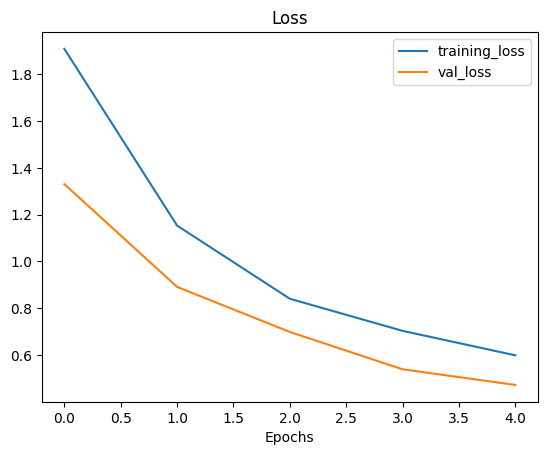

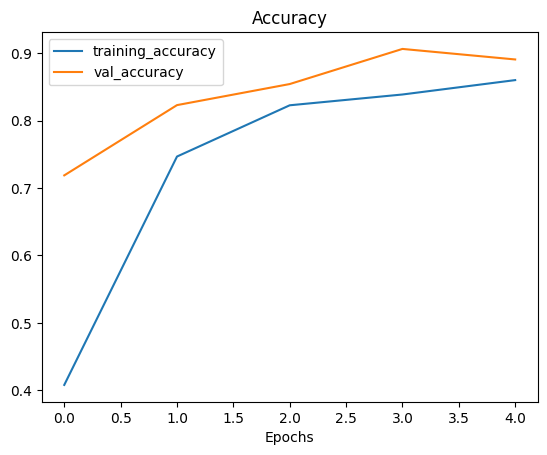

In [35]:
plot_loss_curves(history_10_percent)

In [37]:
input_shape = (1,4,4,3)
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D globa; average pooled input tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D globa; average pooled input tensor: (1, 3)


In [38]:
tf.reduce_mean(input_tensor, axis=[1,2]) # average across the middle axes

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

#transfer learning experiments

In [54]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2024-04-29 12:26:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M  22.7MB/s    in 6.8s    

2024-04-29 12:26:34 (18.8 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [40]:
walk_through_dir("/content/10_food_classes_1_percent")

There are 2 directories and 0 images in '/content/10_food_classes_1_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percen

In [55]:
import tensorflow as tf
IMG_SIZE = (224,224)

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode = "categorical",
                                                                           batch_size=32, # default
                                                                           image_size= IMG_SIZE)
test_dir = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                           label_mode = "categorical",
                                                                           batch_size=32, # default
                                                                           image_size= IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    #preprocesing.Rescaling(1./255) keep for ResNet50v2, remove for EfficientNetv2b0
], name= "data_augmention"
                                     )

(-0.5, 601.5, 545.5, -0.5)

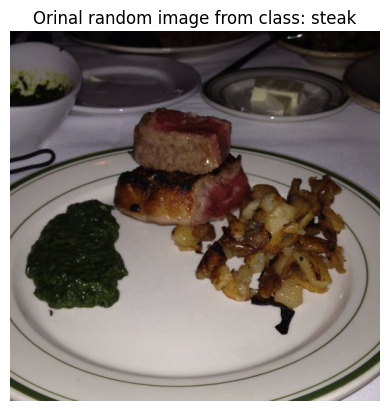

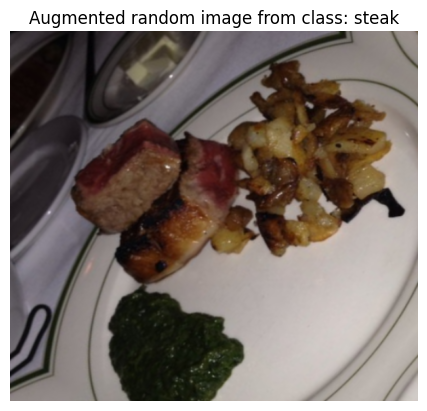

In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "/content/10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Orinal random image from class: {target_class}")
plt.axis(False) #turn off axes

#Augmented
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False)

In [56]:
input_shape = (224,224,3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False
#create a input
inputs = layers.Input(shape= input_shape, name="input_layer")

#add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

#give base_model inputs (after augmention) and don't train it
x = base_model(x, training=False)

#pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

#put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

#make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

#compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_10_percent= model_1.fit(train_data_1_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_1_percent),
                                validation_data=test_dir,
                                validation_steps=int(0.25*len(test_dir)), #validate for less steps
                                #track model trainig logs
                                callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20240429-122701
Epoch 1/5
3/3 [==============================] - 17s 4s/step - loss: 2.3419 - accuracy: 0.1286 - val_loss: 2.2387 - val_accuracy: 0.1151
Epoch 2/5
3/3 [==============================] - 7s 3s/step - loss: 2.0797 - accuracy: 0.2429 - val_loss: 2.1229 - val_accuracy: 0.2188
Epoch 3/5
3/3 [==============================] - 6s 2s/step - loss: 1.8982 - accuracy: 0.4286 - val_loss: 2.0326 - val_accuracy: 0.3273
Epoch 4/5
3/3 [==============================] - 6s 2s/step - loss: 1.7619 - accuracy: 0.5857 - val_loss: 1.9357 - val_accuracy: 0.4178
Epoch 5/5
3/3 [==============================] - 5s 2s/step - loss: 1.6907 - accuracy: 0.6143 - val_loss: 1.8437 - val_accuracy: 0.4803


In [58]:
results_1_percent_data_aug = model_1.evaluate(test_dir)
results_1_percent_data_aug

79/79 [==============================] - 8s 86ms/step - loss: 1.8484 - accuracy: 0.4568


[1.8483691215515137, 0.45680001378059387]

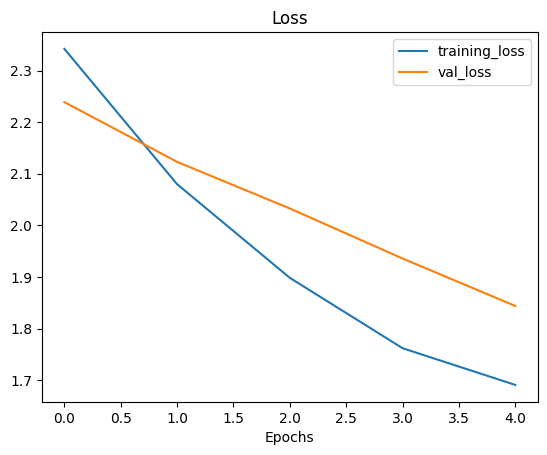

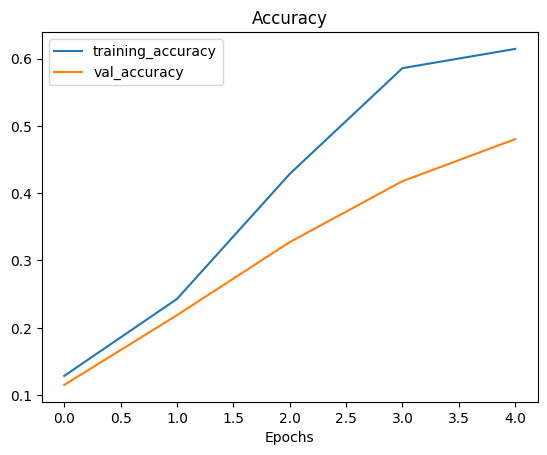

In [60]:
plot_loss_curves(history_10_percent)

# Model 2 : Feature extraction transfer learning with 10% of data and data augmention

In [62]:
!wget !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2024-04-29 12:38:32--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2024-04-29 12:38:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.217.194.207, 172.253.118.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  21.9MB/s    in 8.6s    

2024-04-29 12:38:42 (18.7 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]

FINISHED --2024-04-29 12:38:42--
Total wall clock time: 9.7s
Downloaded: 1 files, 161M in 8.6s (18.7 MB/s)


In [63]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [64]:
train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

In [65]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 750 files belonging to 10 classes.


In [66]:
input_shape = (224,224,3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False
#create a input
inputs = layers.Input(shape= input_shape, name="input_layer")

#add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

#give base_model inputs (after augmention) and don't train it
x = base_model(x, training=False)

#pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

#put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

#make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

#compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_10_percent= model_1.fit(train_data_10_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_10_percent),
                                validation_data=test_data_10_percent,
                                validation_steps=int(0.25*len(test_data_10_percent)), #validate for less steps
                                )

Epoch 1/5
24/24 [==============================] - 37s 1s/step - loss: 2.0597 - accuracy: 0.2987 - val_loss: 1.5511 - val_accuracy: 0.6458
Epoch 2/5
24/24 [==============================] - 23s 937ms/step - loss: 1.4590 - accuracy: 0.6373 - val_loss: 1.0966 - val_accuracy: 0.7760
Epoch 3/5
24/24 [==============================] - 23s 902ms/step - loss: 1.1213 - accuracy: 0.7467 - val_loss: 0.8145 - val_accuracy: 0.8177
Epoch 4/5
24/24 [==============================] - 21s 835ms/step - loss: 0.9507 - accuracy: 0.7587 - val_loss: 0.7440 - val_accuracy: 0.8073
Epoch 5/5
24/24 [==============================] - 20s 805ms/step - loss: 0.8460 - accuracy: 0.7880 - val_loss: 0.5527 - val_accuracy: 0.8698


In [67]:
results_10_percent_data_aug = model_1.evaluate(test_data_10_percent)
results_10_percent_data_aug

24/24 [==============================] - 3s 113ms/step - loss: 0.6392 - accuracy: 0.8440


[0.6391952633857727, 0.843999981880188]

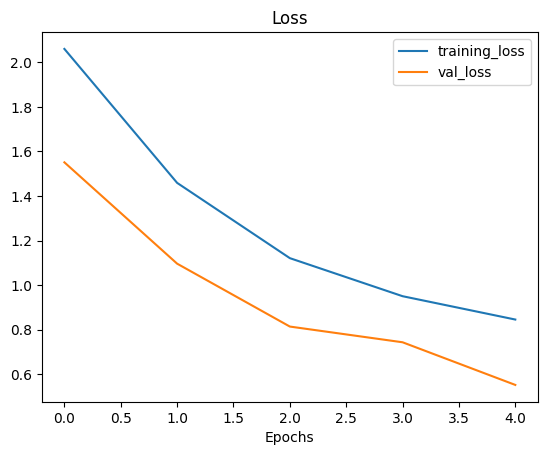

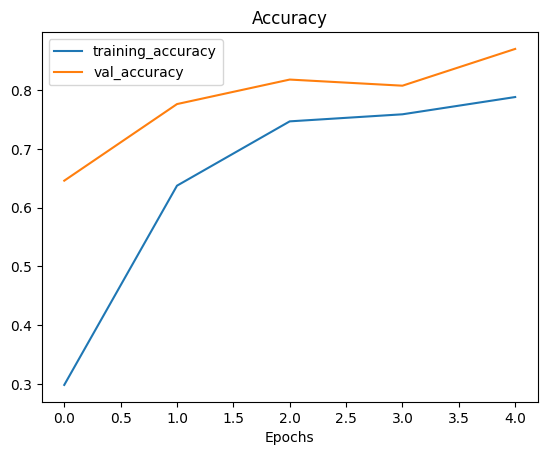

In [68]:
plot_loss_curves(history_10_percent)